In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
%matplotlib inline

In [43]:
df_bom = pd.read_csv('data/bom.movie_gross.csv.gz')
df_imdb_name = pd.read_csv('data/imdb.name.basics.csv.gz')
df_imdb_akas = pd.read_csv('data/imdb.title.akas.csv.gz')
df_imdb_basics = pd.read_csv('data/imdb.title.basics.csv.gz')
df_imdb_crew = pd.read_csv('data/imdb.title.crew.csv.gz')
df_imdb_principals = pd.read_csv('data/imdb.title.principals.csv.gz')
df_imdb_ratings = pd.read_csv('data/imdb.title.ratings.csv.gz')
df_rt_movies = pd.read_csv('data/rt.movie_info.tsv.gz', sep='\t', parse_dates=['theater_date','dvd_date'])
df_rt_reviews = pd.read_csv('data/rt.reviews.tsv.gz', sep='\t',encoding = 'unicode_escape', parse_dates=['date'])
df_tmdb_movies = pd.read_csv('data/tmdb.movies.csv.gz', parse_dates=['release_date'])
df_budget = pd.read_csv('data/tn.movie_budgets.csv.gz', parse_dates=['release_date'])

In [44]:
tmdb_genre_raw = [{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]

In [45]:
tmdb_genre_dict = {}
for element in tmdb_genre_raw:
    tmdb_genre_dict[element['id']] = element['name']
print(tmdb_genre_dict)

{28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


### df_bom (bom.movie_gross.csv)
- title and domestic/foreign gross revenues
- 3387 titles from 2010 to 2018

### df_imdb_name (imdb.name.basics.csv)
- database of professionals: ID, name, birth/death years, profession, and max four known titles
- 606638 names

### df_imdb_akas (imdb.title.akas.csv)
- database of international versions: movie ID, titles in different languages, region, and languages
- 331703 versions

### df_imdb_basics (imdb.title.basics.csv)
- basic information by title: movie ID, primary/original titles, year, length, and genres
- 146144 IDs (136071 unique primary titles)

### df_imdb_crew (imdb.title.crew.csv)
- directors/writers by movie
- 146144 movies

### df_imdb_principals
- movies-professionals database: movie ID, professional ID, category (actor/actoress, director etc), and character
- 1028186 roles

### df_imdb_ratings (imdb.title.ratings.csv)
- rating and voter number by movie
- 73856 movies

### df_rt_movies (rt.movie_info.tsv)
- movie ID/title, rating, genre, director, writer, release date, box office revenue, length, and studio
- 1560 movies with some null values

### df_rt_reviews (rt.reviews.tsv.gz)
- critics rating database: movie ID, comments, rating, fresh/rotten, critic name, top critic dummy, publisher, and date
- 54432 reviews of 1135 titles with some null values

### df_tmdb_movies (tmdb.movies.csv)
- genre, movie ID, language, original title, pupularity score, release date, title, vote rating, vote count
- 26517 movies from 1930 to 2020

### df_budget (tn.movie_budgets.csv)
- release date. movie title, production budget, domestic/global sales
- 5782 movies from 1915 to 2020      

In [46]:
df_tmdb_movies.genre_ids = df_tmdb_movies.genre_ids.str.strip('[]').str.split(',')

In [47]:
for element in tmdb_genre_dict:
    df_tmdb_movies[tmdb_genre_dict[element]] = 0
    df_tmdb_movies.loc[df_tmdb_movies.genre_ids.apply(lambda x: str(element) in x), tmdb_genre_dict[element]] = 1

In [48]:
df_tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 29 columns):
Unnamed: 0           26517 non-null int64
genre_ids            26517 non-null object
id                   26517 non-null int64
original_language    26517 non-null object
original_title       26517 non-null object
popularity           26517 non-null float64
release_date         26517 non-null datetime64[ns]
title                26517 non-null object
vote_average         26517 non-null float64
vote_count           26517 non-null int64
Action               26517 non-null int64
Adventure            26517 non-null int64
Animation            26517 non-null int64
Comedy               26517 non-null int64
Crime                26517 non-null int64
Documentary          26517 non-null int64
Drama                26517 non-null int64
Family               26517 non-null int64
Fantasy              26517 non-null int64
History              26517 non-null int64
Horror               26517 non-nul

In [83]:
df_tmdb_movies['year'] = df_tmdb_movies.release_date.dt.year
df_tmdb_movies['month'] = df_tmdb_movies.release_date.dt.month

In [84]:
df_tmdb_movies_2009_2018 = df_tmdb_movies[
    (df_tmdb_movies['release_date'].dt.year >= 2009) & (df_tmdb_movies['release_date'].dt.year<=2018)&(df_tmdb_movies.vote_count>=10)]

In [85]:
df_tmdb_movies_2009_2018.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count,Action,Adventure,Animation,Comedy,Crime,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,year,month
count,10239.000000,10239.000000,10239.000000,10239.000000,10239.000000,10239.000000,10239.00000,10239.000000,10239.000000,10239.000000,...,10239.000000,10239.000000,10239.000000,10239.000000,10239.000000,10239.000000,10239.000000,10239.000000,10239.000000,10239.000000
mean,12582.689227,251470.502295,6.293169,6.025159,478.314093,0.101084,0.02969,0.038285,0.163200,0.028616,...,0.010060,0.013966,0.034671,0.021096,0.019338,0.071980,0.005469,0.002637,2014.173357,6.690302
std,7504.566551,146934.720884,5.435586,1.109196,1469.761098,0.301455,0.16974,0.191893,0.369566,0.166733,...,0.099797,0.117356,0.182955,0.143711,0.137716,0.258467,0.073756,0.051286,2.465097,3.515113
min,0.000000,189.000000,0.600000,0.000000,10.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,1.000000
25%,5848.500000,103330.000000,2.435500,5.400000,19.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,4.000000
50%,12136.000000,259963.000000,5.232000,6.100000,47.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,7.000000
75%,18502.500000,374455.000000,8.150500,6.800000,204.500000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,10.000000
max,26464.000000,589023.000000,80.773000,9.400000,22186.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2018.000000,12.000000


In [86]:
df_tmdb_movies_2009_2018['log_popularity'] = np.log(df_tmdb_movies_2009_2018.popularity)

/Users/kmiyaki/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


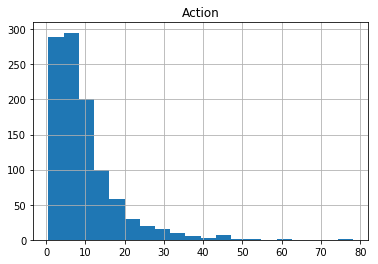

mean
9.501329468599025
std
8.294364501643454


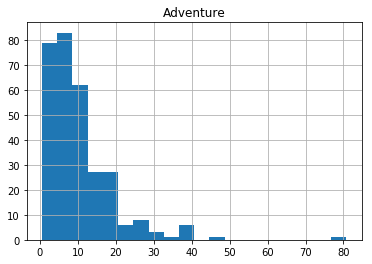

mean
10.327868421052633
std
9.062743236246307


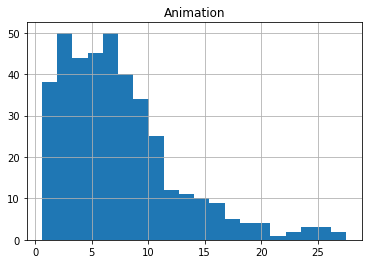

mean
7.474441326530618
std
5.225541723933421


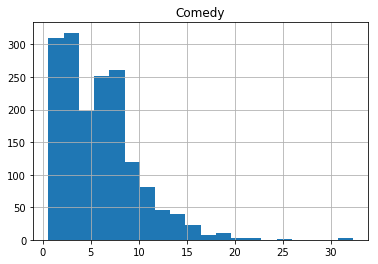

mean
5.910070017953312
std
3.908164187524806


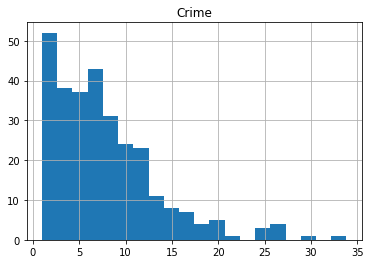

mean
7.777720136518771
std
5.683030189409253


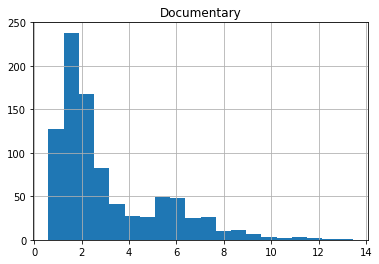

mean
3.064061315496099
std
2.2515977480951808


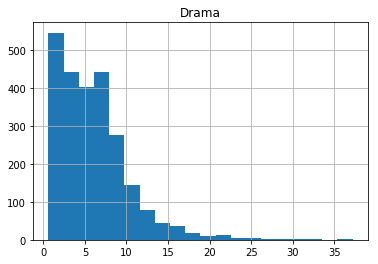

mean
6.070309311740895
std
4.312212925609094


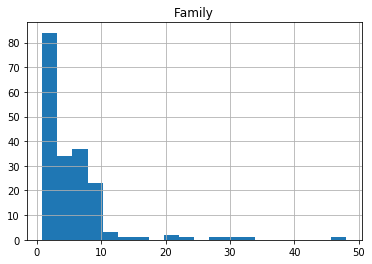

mean
5.443752631578948
std
5.6515166065719145


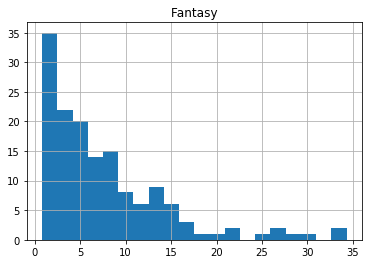

mean
7.716073825503357
std
6.809766381965346


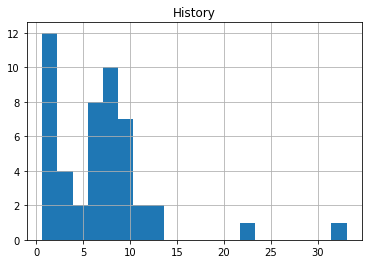

mean
6.872020408163264
std
5.6473170897404765


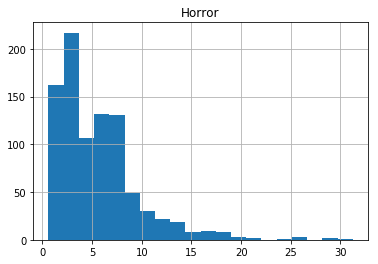

mean
5.614698675496686
std
4.194116618114088


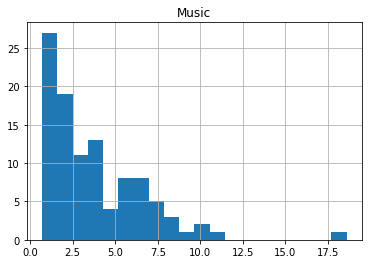

mean
3.7430388349514554
std
2.861250531903874


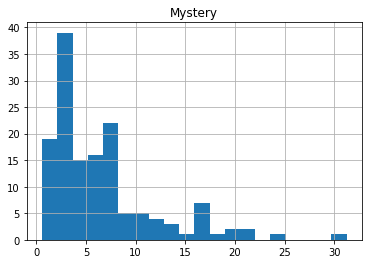

mean
6.540748251748256
std
5.384007048093731


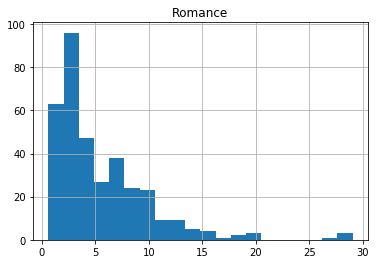

mean
5.49165633802817
std
4.535685049098282


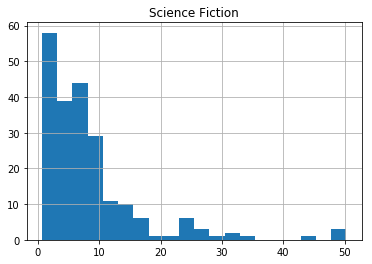

mean
8.448462962962964
std
8.439881751542332


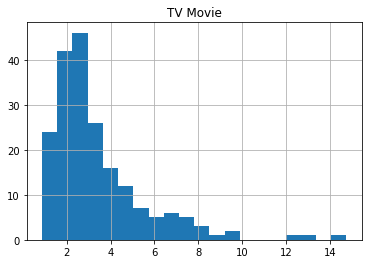

mean
3.3979191919191924
std
2.203305535502738


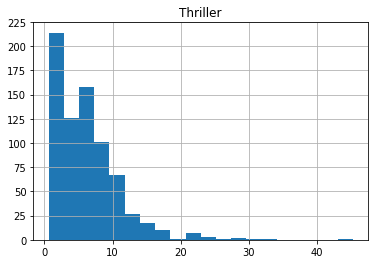

mean
6.254796472184531
std
4.834293800640531


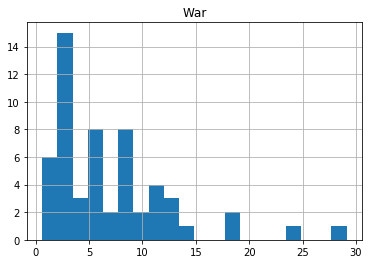

mean
6.9656607142857165
std
5.827764215848088


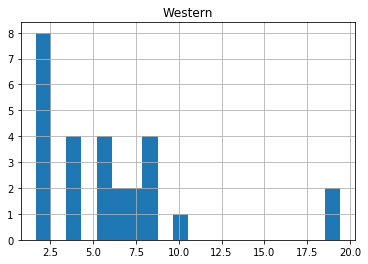

mean
6.143407407407405
std
4.585977374724115


In [68]:
for genre in list(tmdb_genre_dict.values()):
    df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'popularity'].hist(bins=20)
    plt.title(genre)
    plt.show()
    print('mean')
    print (df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'popularity'].mean())
    print('std')
    print (df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'popularity'].std())

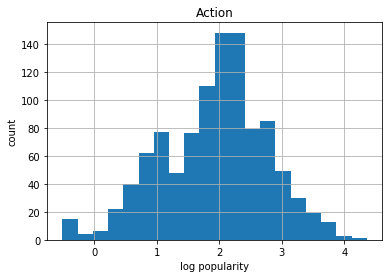

mean
1.921931572182426
std
0.8487809919266127


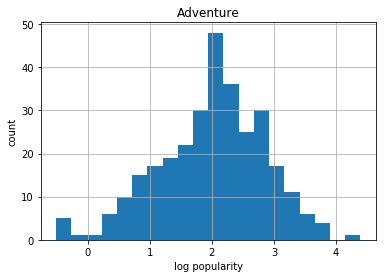

mean
2.003890296908746
std
0.8574714276509715


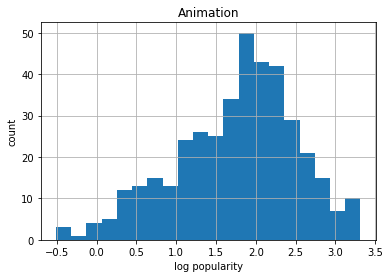

mean
1.7566906954720942
std
0.7602742746507568


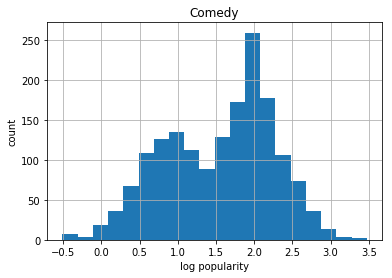

mean
1.547695615493748
std
0.7090864171064428


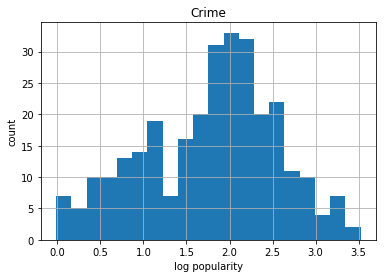

mean
1.7820898170046953
std
0.7734069358459732


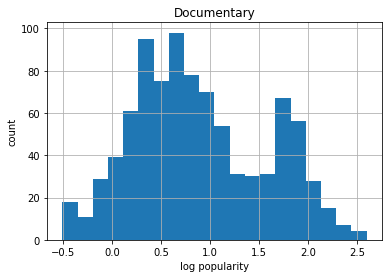

mean
0.8848272985583282
std
0.6756414468989902


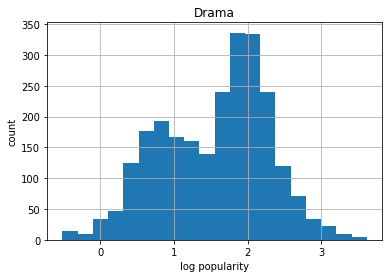

mean
1.5585688997703664
std
0.7296287102392243


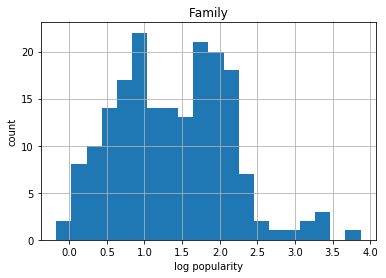

mean
1.3798498362445326
std
0.7589937837510934


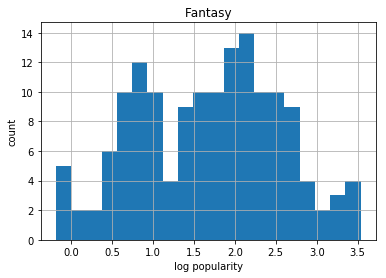

mean
1.6868271019963876
std
0.8716286348778384


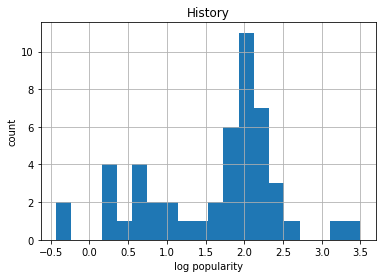

mean
1.6088245828277365
std
0.8714835192332041


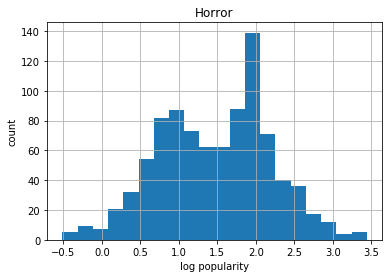

mean
1.4752060182800366
std
0.7229325773744764


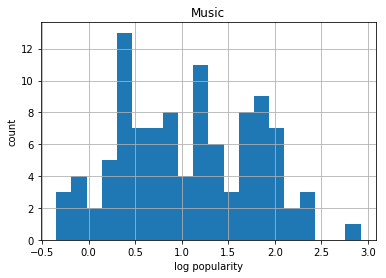

mean
1.0618549296300561
std
0.7264510840226683


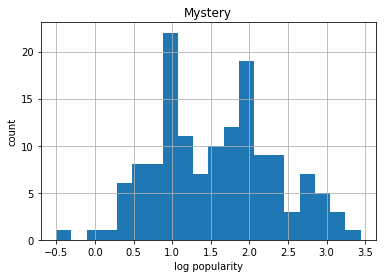

mean
1.584347358951605
std
0.77273677375061


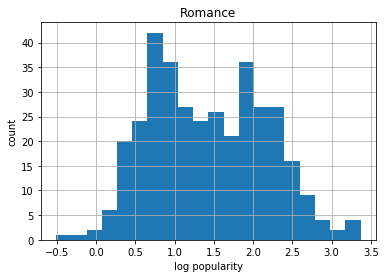

mean
1.4227404048882708
std
0.744645687860271


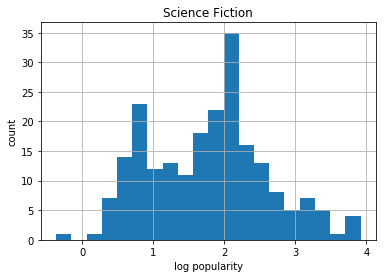

mean
1.7725717087069337
std
0.8400676328390788


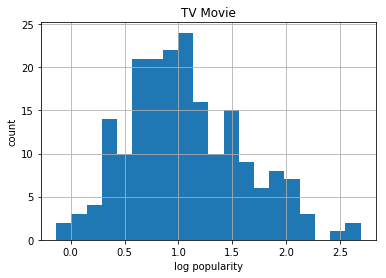

mean
1.0636246588286489
std
0.5446547333275507


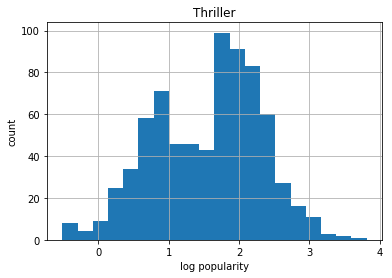

mean
1.5602456186621094
std
0.7667411357298448


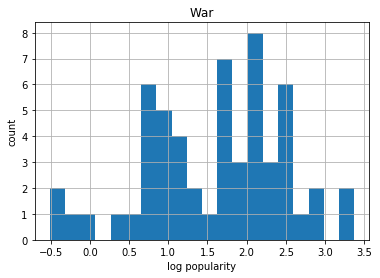

mean
1.5942681812001158
std
0.8949647063053694


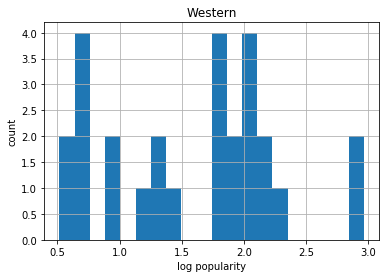

mean
1.5795739281027483
std
0.7028656587824068


In [110]:
boxplot = []
for genre in list(tmdb_genre_dict.values()):
    df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity'].hist(bins=20)
    plt.title(genre)
    plt.xlabel('log popularity')
    plt.ylabel('count')
    plt.show()
    boxplot.append(df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity'])
    print('mean')
    print (df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity'].mean())
    print('std')
    print (df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity'].std())

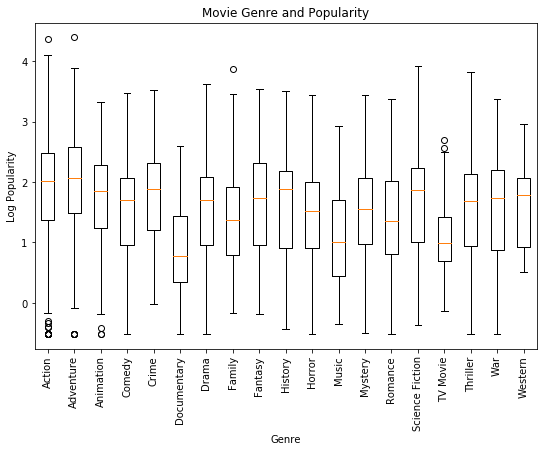

In [119]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
ax.boxplot(boxplot)
ax.set_xticklabels(list(tmdb_genre_dict.values()),rotation=90)
ax.set_title('Movie Genre and Popularity')
ax.set_ylabel('Log Popularity')
ax.set_xlabel('Genre')
plt.show()

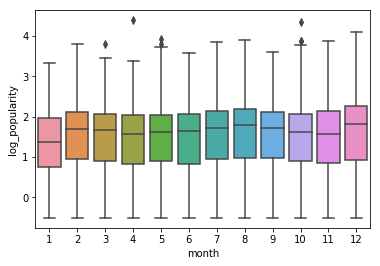

In [124]:
month = df_tmdb_movies_2009_2018.month
lpop = df_tmdb_movies_2009_2018.log_popularity
sns.boxplot(x = month, y = lpop)

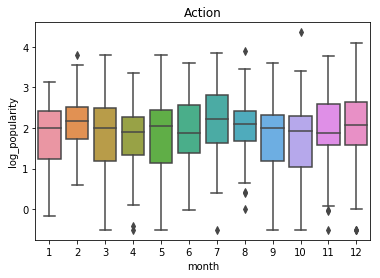

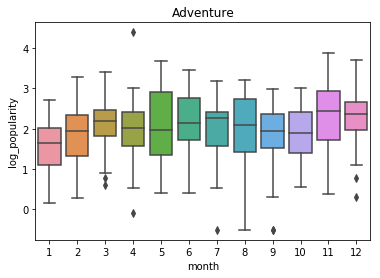

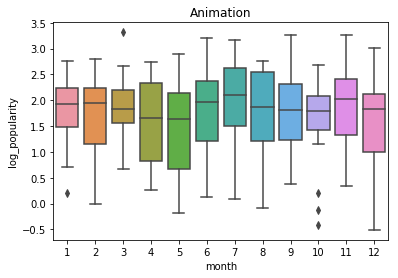

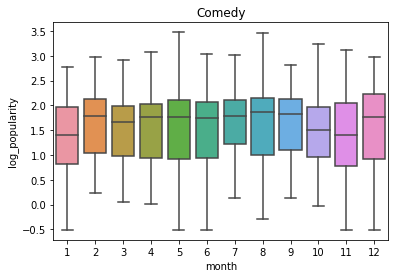

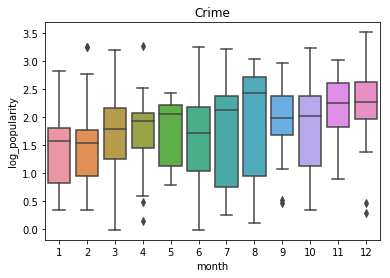

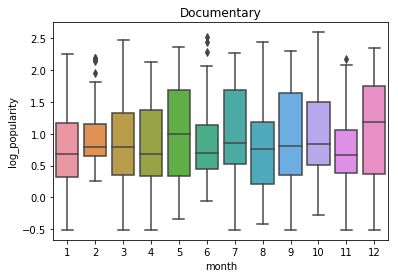

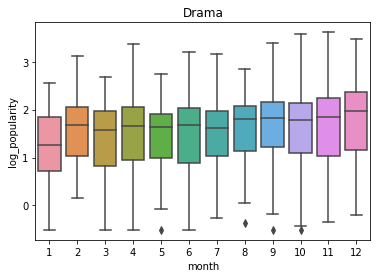

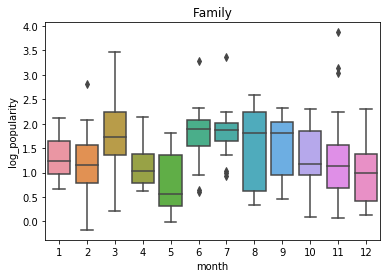

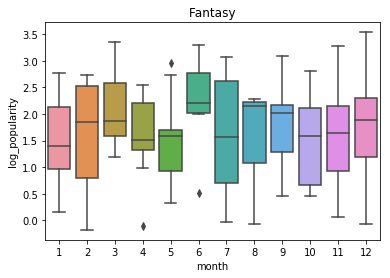

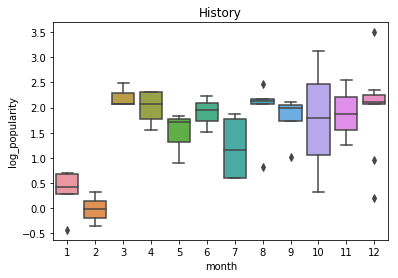

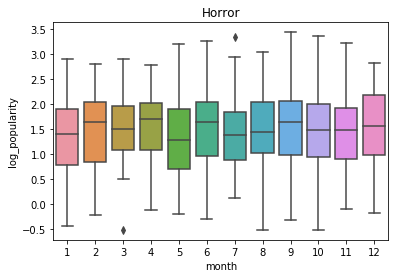

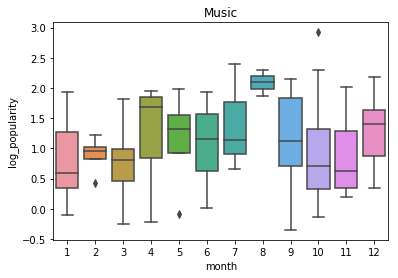

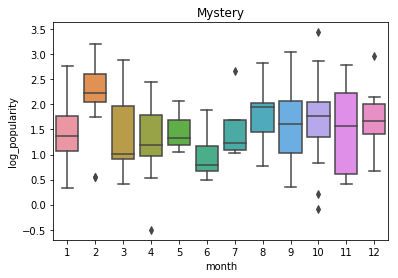

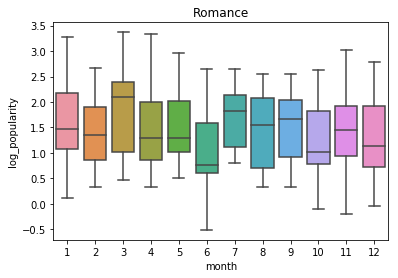

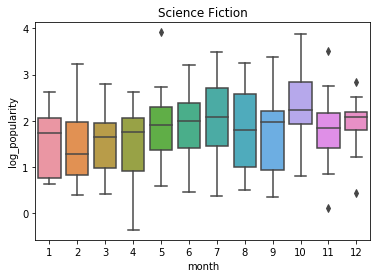

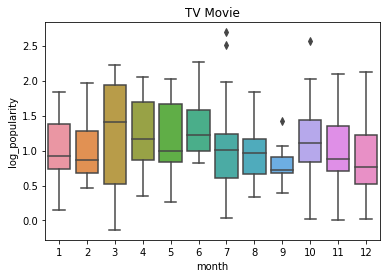

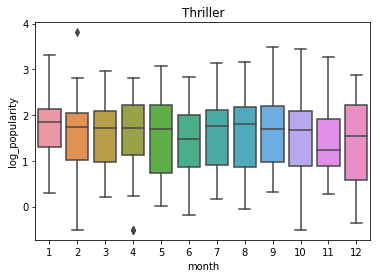

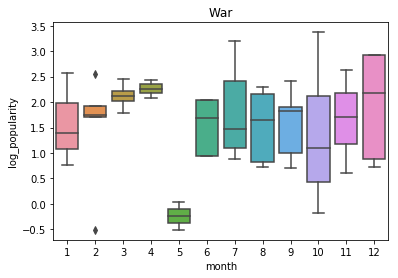

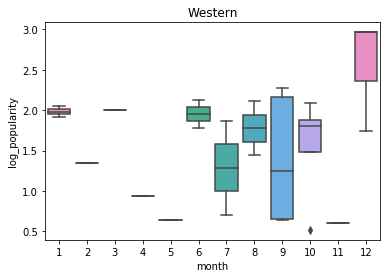

In [92]:
for genre in list(tmdb_genre_dict.values()):
    month = df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'month']
    lpop = df_tmdb_movies_2009_2018.loc[df_tmdb_movies_2009_2018[genre]==1, 'log_popularity']
    sns.boxplot(x = month, y = lpop)
    plt.title(genre)
    plt.show()


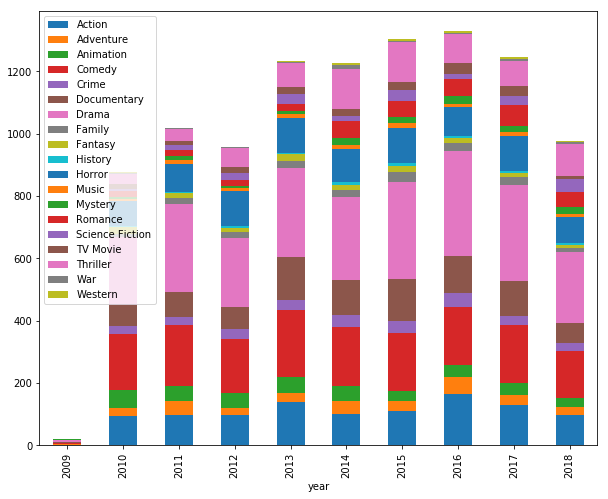

In [133]:
df_tmdb_movies_2009_2018.groupby('year')[list(tmdb_genre_dict.values())].sum().plot(kind='bar', stacked=True, figsize = (10,8))

In [74]:
df_tmdb_movies_2009_2018.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,year,log_popularity
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,0,0,0,0,0,0,0,0,2010,3.512530
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,0,0,0,0,0,0,0,0,2010,3.358081


In [80]:
df_budget.rename(columns={'movie':'title'},inplace=True)
df_budget.head(2)

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [96]:
df_budget.production_budget = df_budget.production_budget.str.replace(',', '')
df_budget.production_budget = df_budget.production_budget.str.replace('$', '')
df_budget.production_budget = df_budget.production_budget.astype(int)

df_budget.domestic_gross = df_budget.domestic_gross.str.replace(',', '')
df_budget.domestic_gross = df_budget.domestic_gross.str.replace('$', '')
df_budget.domestic_gross = df_budget.domestic_gross.astype(int)

df_budget.worldwide_gross = df_budget.worldwide_gross.str.replace(',', '')
df_budget.worldwide_gross = df_budget.worldwide_gross.str.replace('$', '')
df_budget.worldwide_gross = df_budget.worldwide_gross.astype(int)

In [97]:
df_merged = pd.merge(df_tmdb_movies_2009_2018,df_budget,on="title")

In [106]:
df_merged = df_merged[df_merged.worldwide_gross != 0]

In [107]:
df_merged['log_worldwide'] = np.log(df_merged.worldwide_gross)

1820

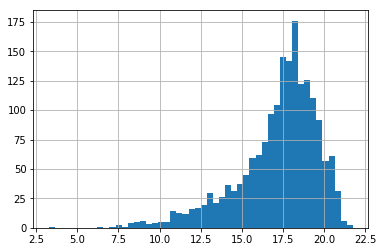

In [134]:
df_merged['log_worldwide'].hist(bins=50)

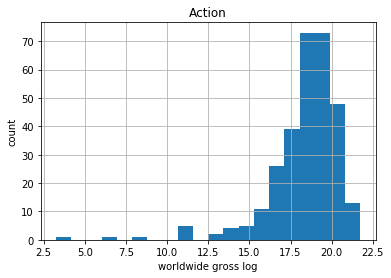

mean
18.38493446081472
std
2.23752721989609


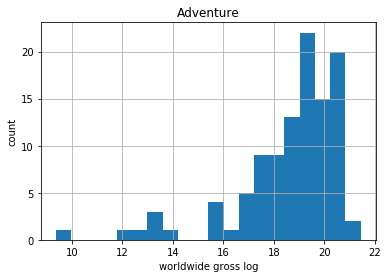

mean
18.60192873537659
std
2.074865207436839


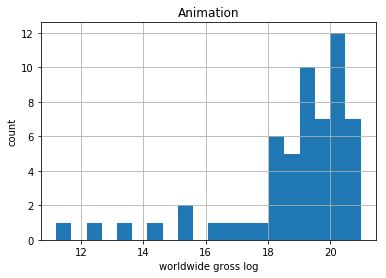

mean
18.824833548733945
std
2.069466275712179


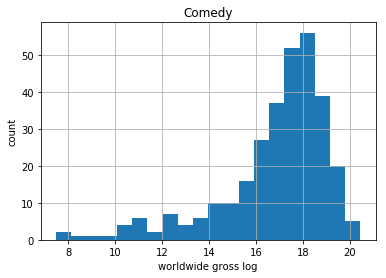

mean
16.837181553547538
std
2.3098639778899877


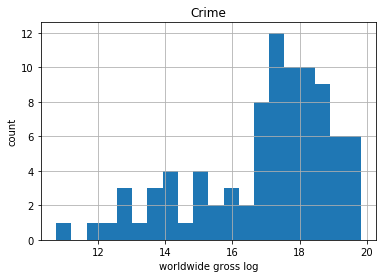

mean
16.959207916226678
std
2.0653394798743543


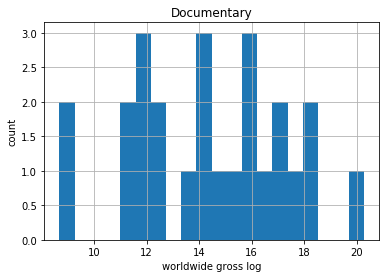

mean
14.4007032726977
std
2.9789005282625243


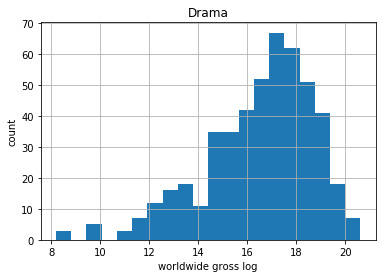

mean
16.49331480028006
std
2.2224205123683642


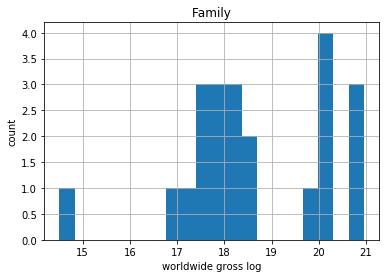

mean
18.615784526346957
std
1.5685390110736992


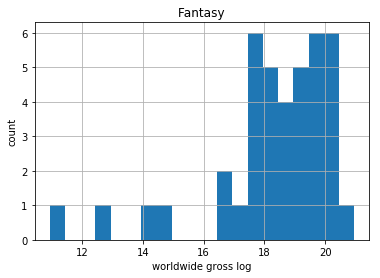

mean
18.272765985525613
std
2.0977567799332903


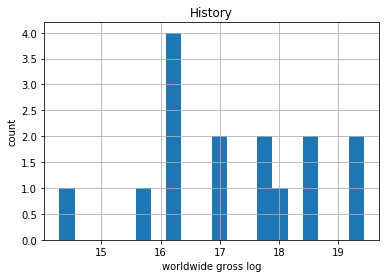

mean
17.197222667923313
std
1.4317256000961867


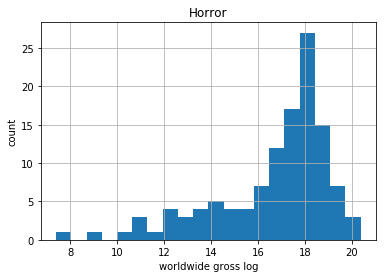

mean
16.692744137935847
std
2.4844993573369623


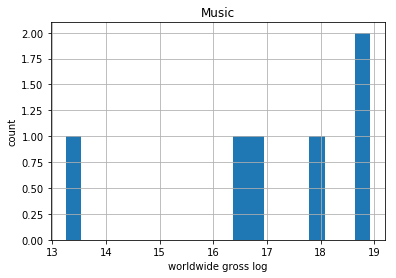

mean
17.0883237333997
std
2.1202382369515513


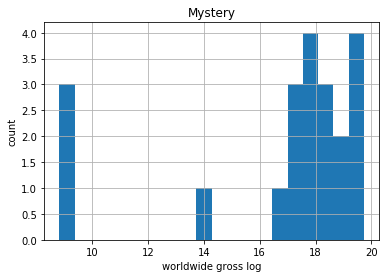

mean
16.74354020134618
std
3.4916533913453764


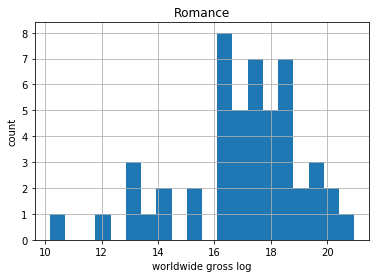

mean
16.999386754912642
std
2.2080854892980484


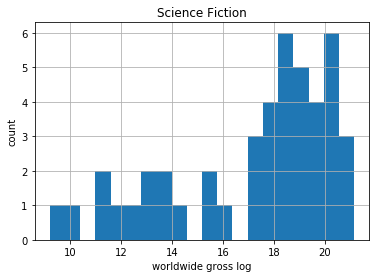

mean
17.160974581113816
std
3.253441357861467


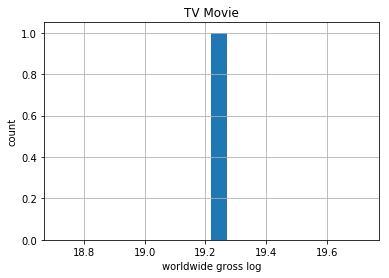

mean
19.219911925891214
std
nan


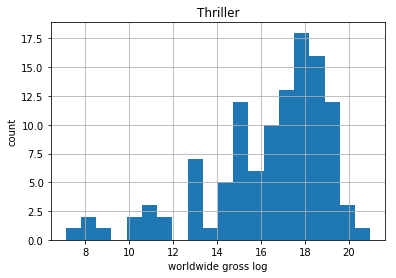

mean
16.328809552387284
std
2.774409047398471


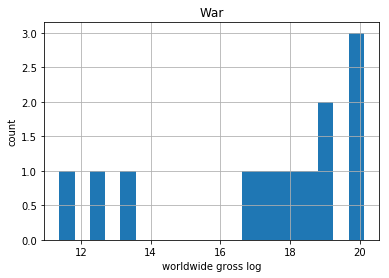

mean
17.244112280640927
std
2.9360784055804117


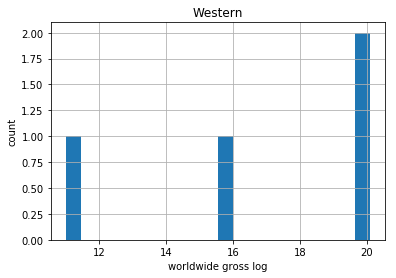

mean
16.776659489676522
std
4.326022948210419


In [109]:
for genre in list(tmdb_genre_dict.values()):
    df_merged.loc[df_merged[genre]==1, 'log_worldwide'].hist(bins=20)
    plt.title(genre)
    plt.xlabel('worldwide gross log')
    plt.ylabel('count')
    plt.show()
    print('mean')
    print (df_merged.loc[df_merged[genre]==1, 'log_worldwide'].mean())
    print('std')
    print (df_merged.loc[df_merged[genre]==1, 'log_worldwide'].std())

In [ ]:
df_imdb_akas.head()

In [ ]:
df_imdb_principals.head()

In [ ]:
df_imdb_principals.groupby('tconst').nconst.count().sort_values(ascending=False).head()

In [ ]:
df_imdb_principals.loc[df_imdb_principals.tconst == 'tt3752398']

In [ ]:
df_imdb_akas.loc[df_imdb_akas.title_id=='tt3752398']

In [ ]:
df_imdb_name.head()

In [ ]:
df_imdb_name.known_for_titles.str.split(',')

In [ ]:
df_imdb_ratings.head()

In [ ]:
df_rt_movies.head()

In [ ]:
df_rt_reviews.head()

In [ ]:
df_budget.head()

In [ ]:
df_budget.production_budget = df_budget.production_budget.str.replace(',', '')
df_budget.production_budget = df_budget.production_budget.str.replace('$', '')
df_budget.production_budget = df_budget.production_budget.astype(int)

df_budget.domestic_gross = df_budget.domestic_gross.str.replace(',', '')
df_budget.domestic_gross = df_budget.domestic_gross.str.replace('$', '')
df_budget.domestic_gross = df_budget.domestic_gross.astype(int)

df_budget.worldwide_gross = df_budget.worldwide_gross.str.replace(',', '')
df_budget.worldwide_gross = df_budget.worldwide_gross.str.replace('$', '')
df_budget.worldwide_gross = df_budget.worldwide_gross.astype(int)

In [ ]:
df_budget['global_profit_ratio'] = df_budget['worldwide_gross']/df_budget['production_budget']
df_budget['domestic_profit_ratio'] = df_budget['domestic_gross']/df_budget['production_budget']

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_figwidth(15)
ax1.scatter(df_budget.release_date, df_budget.production_budget/1000000)
ax1.set_xlabel('release year')
ax1.set_ylabel('production budget')
ax2.scatter(df_budget.release_date, df_budget.worldwide_gross/1000000)
ax2.set_xlabel('release year')
ax2.set_ylabel('worldwide gross')
ax3.scatter(df_budget.production_budget/1000000, df_budget.worldwide_gross/1000000)
ax3.set_xlabel('production budget')
ax3.set_ylabel('worldwide gross')

plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(10)
ax1.scatter(df_budget.release_date, df_budget.global_profit_ratio)
ax1.set_xlabel('release year')
ax1.set_ylabel('worldwide profit ratio')
ax1.set_ylim(0,250)

ax2.scatter(df_budget.release_date, df_budget.domestic_profit_ratio)
ax2.set_xlabel('release year')
ax2.set_ylabel('domestic profit ratio')
ax2.set_ylim(0,250)